In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df=pd.read_csv("startup_funding.csv",na_values=[''])
df.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [140]:
# Total number of funding in a year

# total func=fundingLen-NAN values
total_nan_val=df.AmountInUSD.isnull().sum()
print(f"total fundings:{(df.shape[0]-total_nan_val)}")

total fundings:1525


{2017: 443, 2016: 993, 2015: 936}


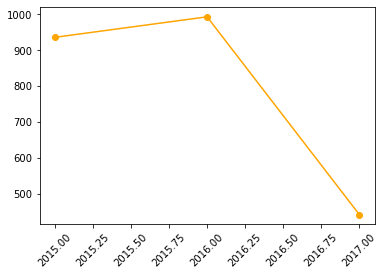

In [141]:
# Print line wise graph b/w year on x-axis and number of fundings on y-axis

def get_year(date):
    year=date[-4:]
    if(not year.isdigit()):
        return np.nan
    return int(year)

df['Years']=df.Date.apply(get_year)
# print(set(df.Years))

yr_fundings={}
for idx,row in df.iterrows():
    yr,incre_val=row.Years,0 if row.AmountInUSD==np.nan else 1
    yr_fundings[yr]=yr_fundings.get(yr,0)+incre_val

print(yr_fundings)
plt.plot(yr_fundings.keys(),yr_fundings.values(),color='orange',marker='o')
plt.xticks(rotation = 45)
plt.show()

In [142]:
# Print year wise Total number of funding . Print years in ascending order
for key in sorted(yr_fundings.keys()):
    print(key,'->',yr_fundings[key])

2015 -> 936
2016 -> 993
2017 -> 443


In [143]:
# First lets chage delhi to New Delhi

df[df.CityLocation=='Delhi']='New Delhi'



# Lets handel case sensitivity and foreign branches
def munge_cities(city):
    '''
        Get Indian Branch of city and title() it
    '''
    if(city==np.nan):
        return 
    
    #get indian branch -> strip space -> title city
    city=str(city)
    city=city.split('/')[0].strip()
    
    return city.title()

df['CityLocation']=df.CityLocation.apply(munge_cities)

In [144]:
# Find top 10 cities which have most number of startups
city_mapping={}

for index,row in df.iterrows():
    city,has_startup=row.CityLocation,0 if row.AmountInUSD==np.nan else 1
    city_mapping[city]=city_mapping.get(city,0)+has_startup

print('Top 10 cities with most number of startups: ')
sorted(city_mapping.values(),reverse=True)

city_no=1
top_10_cities={}
for item in city_mapping:
    if city_no>10:
        break
    print(city_no,':',item,'->',city_mapping[item])
    top_10_cities[item]=city_mapping[item]
    city_no+=1

Top 10 cities with most number of startups: 
1 : Bangalore -> 635
2 : Mumbai -> 449
3 : New Delhi -> 389
4 : Hyderabad -> 77
5 : Ahmedabad -> 35
6 : Gurgaon -> 241
7 : Noida -> 79
8 : Pune -> 91
9 : Kolkata -> 19
10 : Trivandrum -> 2


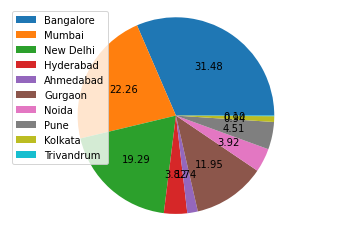

In [145]:
# Plot a pie chart and visualize it
plt.pie(top_10_cities.values(),autopct="%0.2f")
plt.axis('equal')
plt.legend(labels=top_10_cities.keys())
plt.show()

In [146]:
# Print City name & number of startups in that city
print(city_mapping)

{'Bangalore': 635, 'Mumbai': 449, 'New Delhi': 389, 'Hyderabad': 77, 'Ahmedabad': 35, 'Gurgaon': 241, 'Noida': 79, 'Pune': 91, 'Kolkata': 19, 'Trivandrum': 2, 'Chennai': 67, 'Chandigarh': 10, 'Jaipur': 25, 'Vadodara': 9, 'Surat': 1, 'Missourie': 1, 'Panaji': 1, 'Gwalior': 2, 'Karur': 1, 'Udupi': 2, 'Kochi': 2, 'Indore': 9, 'Singapore': 5, 'Goa': 8, 'Agra': 2, 'Hubli': 1, 'Kerala': 1, 'Kozhikode': 1, 'Us': 2, 'Coimbatore': 3, 'Siliguri': 2, 'Nan': 179, 'Usa': 2, 'Lucknow': 1, 'Kanpur': 4, 'Sfo': 1, 'London': 1, 'Seattle': 1, 'Varanasi': 1, 'Bhopal': 2, 'Jodhpur': 1, 'Boston': 1, 'Belgaum': 1, 'New York': 1, 'Nagpur': 1, 'India': 1, 'Udaipur': 1, 'Dallas': 1}


In [203]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Years
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Privateequity,"1,300,000",NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Privateequity,NaN,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seedfunding,NaN,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seedfunding,"500,000",NaN,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seedfunding,"850,000",NaN,2017


In [169]:
# 1.There are 4 types of investments Find out percentage of amount of funded for each investment types

print(set(df.InvestmentType))


# First let fix types of investmentTypes
def fix_investmentType(investment):
    '''Fix and convert value to similar values'''
    if investment==np.nan:
        return
    investment=str(investment)
    investment=investment.title()
    investment=investment.replace(' ','')
    return investment

# Fix 'Privateequity' type to correct-one
df['InvestmentType'][df.InvestmentType=='Privateequity']='PrivateEquity'
# Corrupt-data
df['InvestmentType'][df.InvestmentType=='Newdelhi']=np.nan
# Fix-rest-values
df['InvestmentType']=df.InvestmentType.apply(fix_investmentType)

print(set(df.InvestmentType))

{'Debtfunding', 'Nan', 'Newdelhi', 'Seedfunding', 'Privateequity', 'Crowdfunding'}
{'Debtfunding', 'Nan', 'Seedfunding', 'Privateequity', 'Crowdfunding'}


In [171]:
investmentType_mapping={}
for idx,row in df.iterrows():
    investmentType,amnt=row.InvestmentType, 0 if row.AmountInUSD==np.nan else row.AmountInUSD
    
    amnt=str(amnt)    
    amnt=amnt.replace(',','')
    
    if investmentType==np.nan or not amnt.isdigit():
        continue
        
    
#     print((investmentType),(amnt))
    investmentType_mapping[investmentType]=investmentType_mapping.get(investmentType,0)+int(amnt)
print(investmentType_mapping)

{'Privateequity': 18006085000, 'Seedfunding': 332345708, 'Debtfunding': 7800000, 'Crowdfunding': 155768}


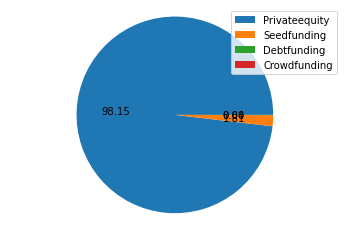

In [202]:
plt.pie(investmentType_mapping.values(),autopct="%.2f")
plt.legend(labels=investmentType_mapping.keys())

plt.axis('equal')
plt.show()

In [204]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Years
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Privateequity,"1,300,000",NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Privateequity,NaN,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seedfunding,NaN,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seedfunding,"500,000",NaN,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seedfunding,"850,000",NaN,2017


In [227]:
investors_mapping={}
# print(df.InvestorsName)
for idx,row in df.iterrows():
    
    investors=[e.strip() for e in str(row.InvestorsName).split(',')]
#     print(investors)
    for invstr in investors:
        investors_mapping[invstr]=investors_mapping.get(invstr,0)+1

count=0
for invstr,cnt in sorted(investors_mapping.items(),key=lambda item: item[1],reverse=True):
    if count>10:
        break
    print(f'{invstr}->{cnt}')
    count+=1

Sequoia Capital->64
Accel Partners->53
Kalaari Capital->44
SAIF Partners->41
Indian Angel Network->40
Blume Ventures->39
->38
Undisclosed Investors->33
Ratan Tata->29
Undisclosed investors->28
Rajan Anandan->25
